In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [626]:
#Read training data
df_train = pd.read_csv('train20210817v2.csv')
df_train.shape

(98072, 15)

In [627]:
df_train.head()   #訓練資料

,SeqNo,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,O
0,1,0,23.5,23.6,23.6,23.6,23.8,24.3,23.6,23.5,22.6,23.3,23.1,22.3,0.0
1,2,0,23.5,23.6,23.6,23.6,23.8,24.3,23.6,23.5,22.6,23.3,23.1,22.3,-0.6
2,3,0,23.5,23.5,23.6,23.6,23.8,24.3,23.6,23.5,22.6,23.3,23.1,22.3,0.6
3,4,0,23.5,23.5,23.6,23.6,23.8,24.3,23.6,23.5,22.6,23.3,23.1,22.3,-0.6
4,5,0,23.5,23.5,23.6,23.6,23.8,24.3,23.6,23.5,22.6,23.3,23.1,22.3,-0.3


In [628]:
df2 = pd.DataFrame()   #空DATAframe

In [629]:
df2['r1']=df_train['F_1']/24000  #將值標準化後放到df2
df2['r2']=df_train['F_2']/31
df2['r3']=df_train['F_3']/31
df2['r4']=df_train['F_4']/31
df2['r5']=df_train['F_5']/31
df2['r6']=df_train['F_6']/31
df2['r7']=df_train['F_7']/31
df2['r8']=df_train['F_8']/31
df2['r9']=df_train['F_9']/31
df2['r10']=df_train['F_10']/31
df2['r11']=df_train['F_11']/31
df2['r12']=df_train['F_12']/31
df2['r13']=df_train['F_13']/31

In [630]:
df2.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13
0,0.0,0.758065,0.761290,0.76129,0.76129,0.767742,0.783871,0.76129,0.758065,0.729032,0.751613,0.745161,0.719355
1,0.0,0.758065,0.761290,0.76129,0.76129,0.767742,0.783871,0.76129,0.758065,0.729032,0.751613,0.745161,0.719355
2,0.0,0.758065,0.758065,0.76129,0.76129,0.767742,0.783871,0.76129,0.758065,0.729032,0.751613,0.745161,0.719355
3,0.0,0.758065,0.758065,0.76129,0.76129,0.767742,0.783871,0.76129,0.758065,0.729032,0.751613,0.745161,0.719355
4,0.0,0.758065,0.758065,0.76129,0.76129,0.767742,0.783871,0.76129,0.758065,0.729032,0.751613,0.745161,0.719355


In [631]:
dfy = pd.DataFrame(df_train['O']/85)  #將O標準化

In [632]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout

In [633]:
# create and fit a Baseline Neural Network Model  模型
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(256, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(1))

In [634]:
model.compile(loss='mse', optimizer='adam')  #訓練方式

In [635]:
X=df2.to_numpy()   #將df2塞到x

In [636]:
y=dfy.to_numpy()  #將dfy塞到y

In [637]:
model.fit(X, y, epochs=30, batch_size=1024, verbose=1)  #用X、Y進行訓練

Epoch 1/30
98072/98072 [==============================] - 4s 40us/sample - loss: 0.0312
Epoch 2/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0220
Epoch 3/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0212
Epoch 4/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0202
Epoch 5/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0189
Epoch 6/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0173
Epoch 7/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0157
Epoch 8/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0145
Epoch 9/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0136
Epoch 10/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0129
Epoch 11/30
98072/98072 [==============================] - 1s 8us/sample - loss: 0.0128
Epoch 12/30
98072/98072 [===============

In [638]:
yhat = model.predict(X)*85   #預測X   出來的值須乘上85  

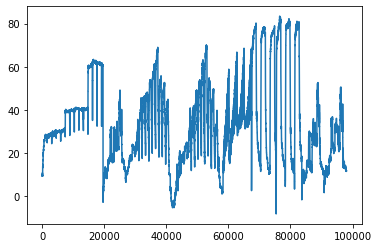

In [639]:
plt.plot(yhat)   #預測出的值的PLOT
plt.show()

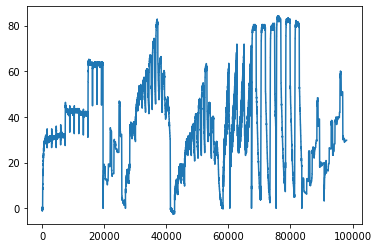

In [640]:
plt.plot(df_train["O"])  #O的PLOT
plt.show()

In [641]:
df_train['Ohat']=pd.DataFrame(yhat) #在原始資料新增Ohat 並將yhat放入

In [643]:
df2['error']= abs(df_train["O"] - df_train["Ohat"])   #算出誤差值

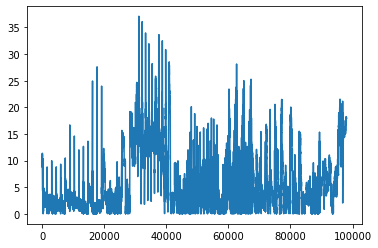

In [647]:
plt.plot(df2['error'])
plt.show()

In [648]:
#df2 = pd.concat([df2[:240],df2])   #因LSTM會捨棄前面的部分資料  因此將前240筆資料先複製  放到前面

In [649]:
all_y = df2['error'].values
dataset=all_y.reshape(-1, 1)

(98312, 14)

In [654]:
def create_dataset(dataset, look_back=1):  #創建dataset給出 x 和 y 
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [655]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))   #最大最小值標準化  把值縮放到0~1
dataset = scaler.fit_transform(dataset)

In [763]:
dataset

array([[ 9.70576572],
       [10.30576572],
       [ 8.77694836],
       ...,
       [17.95957355],
       [17.95957355],
       [17.95957355]])

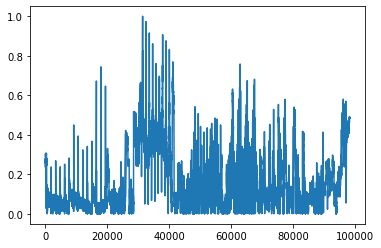

In [657]:
plt.plot(dataset)
plt.show()

In [658]:
# split into train and test sets, 50% test data, 50% training data  將資料切成訓練和測試資料
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [659]:
all = dataset[:,:]  #將誤差值放到all

In [662]:
# reshape into X=t and Y=t+1, timestep 240
look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [663]:
allX, allY = create_dataset(all, look_back)    #allX = 只有數據  allY = 只有答案   

In [774]:
train.shape

(78649, 1)

In [669]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [670]:
allX = np.reshape(allX, (allX.shape[0], 1, allX.shape[1]))

In [671]:
from tensorflow.keras.layers import LSTM

In [672]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [673]:
model.fit(trainX, trainY, epochs=10, batch_size=240, verbose=1)

Epoch 1/10
78409/78409 [==============================] - 8s 107us/sample - loss: 0.0021
Epoch 2/10
78409/78409 [==============================] - 3s 42us/sample - loss: 8.5636e-04
Epoch 3/10
78409/78409 [==============================] - 3s 45us/sample - loss: 6.6502e-04
Epoch 4/10
78409/78409 [==============================] - 3s 42us/sample - loss: 5.7782e-04
Epoch 5/10
78409/78409 [==============================] - 3s 39us/sample - loss: 5.3213e-04
Epoch 6/10
78409/78409 [==============================] - 3s 41us/sample - loss: 5.1543e-04
Epoch 7/10
78409/78409 [==============================] - 3s 39us/sample - loss: 4.7249e-04
Epoch 8/10
78409/78409 [==============================] - 4s 49us/sample - loss: 4.5443e-04
Epoch 9/10
78409/78409 [==============================] - 4s 45us/sample - loss: 4.3896e-04
Epoch 10/10
78409/78409 [==============================] - 3s 40us/sample - loss: 4.3643e-040s - los


In [ ]:
model.fit(allX, allY, epochs=10, batch_size=240, verbose=1)

In [675]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)   #用TrainX和TrainY進行訓練了   再將訓練完的模型用來預測allX

In [ ]:
allPredict= model.predict(allX)

In [749]:
# invert predictions 
# 將標準化的數據轉回原數據
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [719]:
allPredict = scaler.inverse_transform(allPredict)  #將標準化的數據轉回原數據
allY = scaler.inverse_transform([allY])

ValueError: Found array with dim 3. Estimator expected <= 2.

In [720]:
import math
# calculate root mean squared error  誤差
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11043.79 RMSE
Test Score: 0.41 RMSE


In [721]:
testScore = math.sqrt(mean_squared_error(allY[0], allPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 25452.13 RMSE


In [722]:
look_back

240

In [723]:
# shift train predictions for plotting  # 用於繪圖的移位列車預測
##trainPredictPlot = np.empty_like(dataset)
#trainPredictPlot[:, :] = np.nan
#trainPredictPlot[look_back:len(trainPredict)+look_back, :]  = trainPredict

In [724]:
#allPredictPlot = np.empty_like(dataset)
#allPredictPlot[:, :] = np.nan
#allPredictPlot[look_back:len(allPredict)+look_back, :]  = allPredict


In [725]:
# shift test predictions for plotting
#testPredictPlot = np.empty_like(dataset)
#testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict

In [726]:
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
#print('testPrices:')
#testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

#print('testPredictions:')
#print(testPredict)
# plot the actual price, prediction in test data=red line, actual price=blue line
#plt.plot(testPredictPlot)
#plt.show()#

In [727]:
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(dataset))
#plt.plot(allPredictPlot)

In [733]:
#for i in range(0,240):
#    dataset = np.delete(dataset,i,axis=0)

In [734]:
O240=scaler.inverse_transform(dataset)

In [735]:
O240.shape

(97832, 1)

In [736]:
O240[:10]

array([[ 9.97694836],
       [ 9.97694836],
       [ 9.85357571],
       [10.15357571],
       [ 9.85357571],
       [10.15357571],
       [10.45357571],
       [10.15357571],
       [10.33245354],
       [10.15357571]])

In [738]:
df_train['error']= abs(df_train["O"] - df_train["Ohat2"])